In [186]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [187]:
df = pd.read_csv('Iris.csv')

In [188]:
# Limpiar Datos
# Mapeo de datos
unique_species = df['Species'].unique()
# Crear un diccionario de mapeo para los valores únicos de "species" a enteros
species_mapping = {species: idx for idx, species in enumerate(unique_species)}
# Mapear los valores de la columna "species" a enteros utilizando el diccionario de mapeo
df['Species'] = df['Species'].map(species_mapping)
# Imputar los valores faltantes con la media de cada columna (solo para columnas numéricas)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [189]:
centers = range(1, 9)
clusters = [KMeans(n_clusters=center) for center in centers]
scores = [model.fit(df).score(df) for model in clusters]

C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

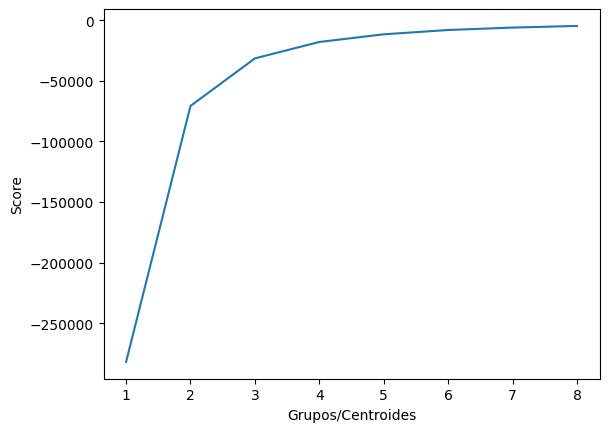

In [190]:
# Aplicamos la curva de Elbow
plt.plot(centers, scores)
plt.xlabel("Grupos/Centroides")
plt.ylabel("Score")
plt.show()

In [191]:
# Aplicamos el algoritmo de K-Means
k_means = KMeans(n_clusters=4)
k_means.fit(df)

C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [192]:
# Visualizamos los centroides
k_means.cluster_centers_

array([[132.        ,   6.59459459,   2.98378378,   5.51351351,
          2.02432432,   2.        ],
       [ 56.5       ,   5.61842105,   2.95263158,   3.33684211,
          0.97368421,   0.65789474],
       [ 94.5       ,   6.10263158,   2.82631579,   4.70526316,
          1.55526316,   1.34210526],
       [ 19.        ,   5.05675676,   3.46216216,   1.46486486,
          0.23783784,   0.        ]])

In [193]:
# Visualizamos los grupos
k_means.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

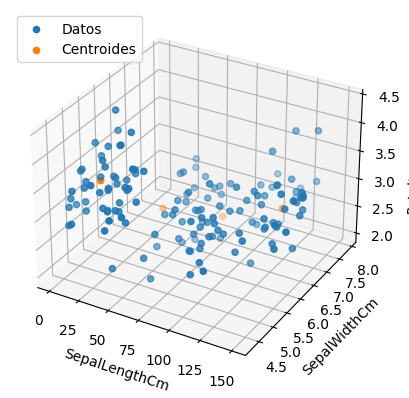

In [194]:
# Visualizaremos los datos de manera tridimensional
df_array = df.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_array[:, 0], df_array[:, 1], df_array[:, 2])
centroids = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel('SepalLengthCm')
axis.set_ylabel('SepalWidthCm')
axis.set_zlabel('PetalLengthCm')
plt.legend((chart, centroids), ('Datos', 'Centroides'), loc='upper left')
plt.show()

In [195]:
iris_spicies_group = ['Iris-setosa',
                      'Iris-versicolor',
                      'Iris-virginica']

In [196]:
id = 70
sepalLengthCm = 5.6
sepalWidthCm = 2.5
petalLengthCm = 3.9
petalWidthCm = 1.1
speciesName = 0
datos = [[id, sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm, speciesName]]
print(f'El grupo al que pertenece el nuevo dato es: {iris_spicies_group[k_means.predict(datos)[0]]}')

El grupo al que pertenece el nuevo dato es: Iris-versicolor


C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [197]:
df['Species'] = k_means.labels_

In [198]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3
